Node 6194 data: {'features': [1234, 3152, 357, 846, 673, 1085, 920, 224, 810, 14, 588, 2350, 257, 928, 1796, 3092, 3044, 1530, 1213, 1745]}
Number of nodes: 7126
Number of edges: 35324
Density: 0.001391
Graph diameter: 10
Average clustering coefficient: 0.1309
Average shortest path length: 3.6776


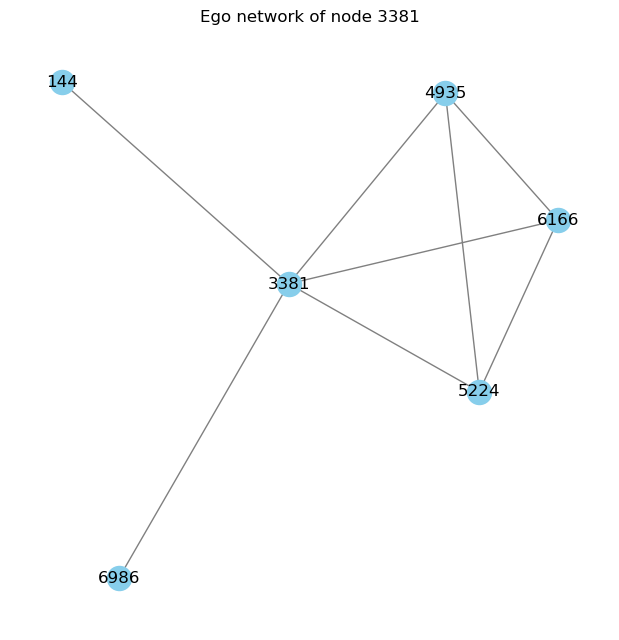

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import json
from IPython.display import HTML

# --- Load edges ---
edges = pd.read_csv(r'C:\Users\hotga\Documents\Data 620\data_week3\musae_ENGB_edges.csv')
# Cast columns to int
edges["from"] = edges["from"].astype(int)
edges["to"] = edges["to"].astype(int)

G = nx.from_pandas_edgelist(edges, source="from", target="to")

# --- Load features (JSON) ---
with open(r"C:\Users\hotga\Documents\Data 620\data_week3\musae_ENGB_features.json", "r") as f:
    features = json.load(f)

# Ensure keys are ints
features = {int(k): v for k, v in features.items()}

# Attach features to nodes
for node_id, feats in features.items():
    if node_id in G:
        G.nodes[node_id]["features"] = feats

# --- Load targets (CSV) ---
targets = pd.read_csv(r"C:\Users\hotga\Documents\Data 620\data_week3\musae_ENGB_target.csv")
# Cast id column to int
targets["id"] = targets["id"].astype(int)

# Attach targets to nodes
for _, row in targets.iterrows():
    node_id = int(row["id"])
    if node_id in G:
        G.nodes[node_id]["days"] = int(row["days"])
        G.nodes[node_id]["mature"] = int(row["mature"])
        G.nodes[node_id]["views"] = int(row["views"])
        G.nodes[node_id]["partner"] = int(row["partner"])
        G.nodes[node_id]["new_id"] = int(row["new_id"])

# --- Example: check data for one node ---
sample_node = list(G.nodes())[0]
print(f"Node {sample_node} data:", G.nodes[sample_node])

# Number of nodes & edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density:.6f}")

# Diameter (only works if the graph is connected)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Graph diameter: {diameter}")
else:
    # Handle disconnected case
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    print(f"Graph is disconnected. Diameter of largest connected component: {diameter}")

# Average clustering coefficient
clustering_coeff = nx.average_clustering(G)
print(f"Average clustering coefficient: {clustering_coeff:.4f}")

# Average shortest path length
if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_path_len:.4f}")
else:
    avg_path_len = nx.average_shortest_path_length(subgraph)
    print(f"Average shortest path length (largest component): {avg_path_len:.4f}")

# Pick a random node
#sample_node = random.choice(list(G.nodes()))
sample_node = 3381

# Get its ego network (node + neighbors within radius=1)
H = nx.ego_graph(G, sample_node, radius=1)

plt.figure(figsize=(6,6))
nx.draw(H, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")
plt.title(f"Ego network of node {sample_node}")
plt.show()

HTML('<a href="https://youtu.be/AReBxyyFwnA">YouTube Recording</a>')
